# <span style="font-weight: bold;">밀도기반 군집화 (Density-based clustering)</span>

## <span style="font-weight: bold;"> 1.라이브러리 로드</span>

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action="ignore")

# 데이터 정규화 패키지
from sklearn.preprocessing import StandardScaler

# 군집분석 관련 패키지
from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MeanShift


# 차원축소를 위한 패키지
from sklearn.decomposition import PCA

# 유사도 측정 관련 패키지
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 그래프의 style을 'seaborn-whitegrid'로 설정
plt.style.use(["seaborn-whitegrid"])

# 마이너스 기호(-) 깨짐 방지
matplotlib.rcParams["axes.unicode_minus"] = False

# 한글 폰트 사용하기
plt.rc("font", family="Malgun Gothic")

## <span style="font-weight: bold;"> 2.군집화 예시</span>

### <span style="font-weight: bold;"> 2.1 랜덤 데이터 생성</span>

In [2]:
# 데이터를 무작위로 생성
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

### <span style="font-weight: bold;"> 2.2 산점도 시각화 함수</span>

In [3]:
# 2차원 평면공간에 주어진 dataset에 대한 산점도를 시각화하는 함수
def plot_data(dataset, position, title):
    X, y = dataset  # 2차원 배열로 X는 데이터 포인트에 대한 튜플, y는 label
    plt.subplot(position)  # 매개변수 position 자리에 오는 argument의 위치에 subplot을 그림
    plt.title(title)  # plot의 제목을 매개변수 title 자리에 오는 argument로 설정
    plt.scatter(X[:, 0], X[:, 1])  # 2개의 X변수를 사용하여 산점도를 시각화

### <span style="font-weight: bold;"> 2.3 다양한 형태의 군집화</span>

In [4]:
# 다양한 형태의 군집화 결과
circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state
)  # factor는 내부와 외부 원의 크기 비율을 설정하는 파라미터
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

### <span style="font-weight: bold;"> 2.4 결과 시각화</span>

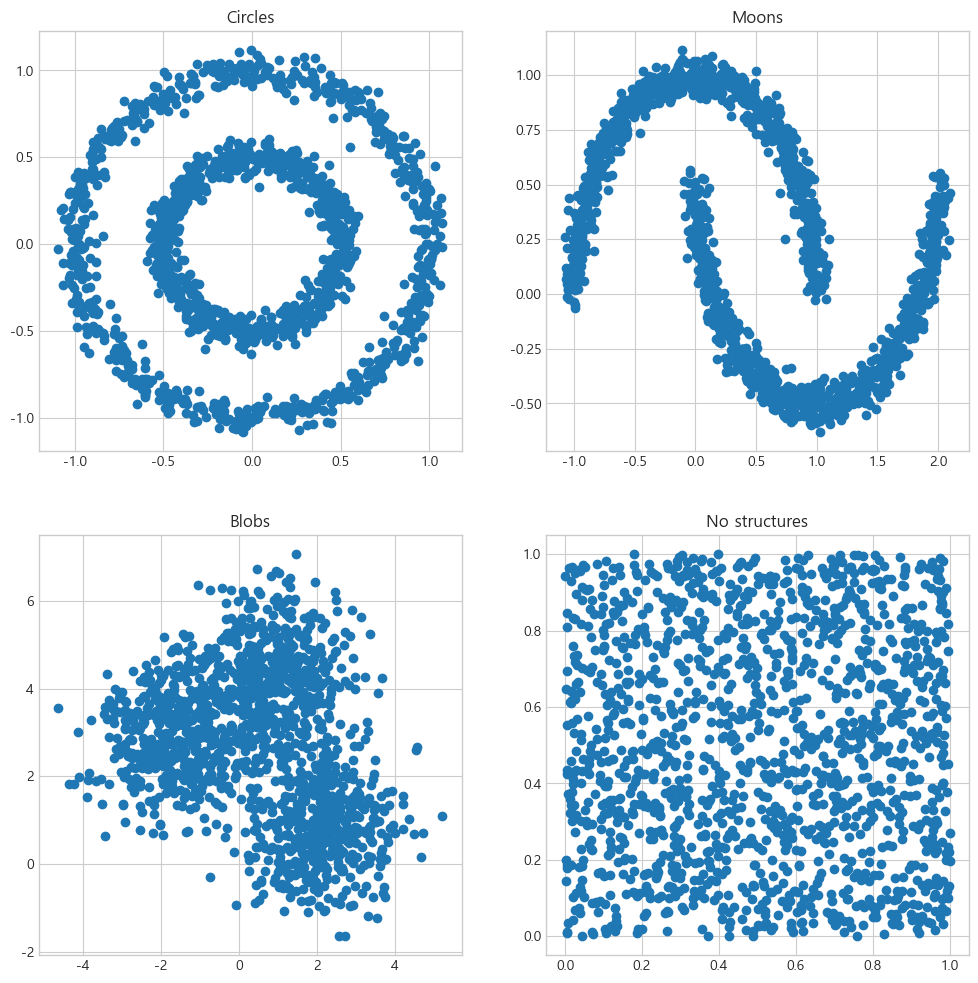

In [5]:
plt.figure(figsize=(12, 12))
plot_data(circles, 221, "Circles")
plot_data(moons, 222, "Moons")
plot_data(blobs, 223, "Blobs")
plot_data(no_structures, 224, "No structures")

In [6]:
# argument에 주어진 모델을 사용하여 데이터셋에 대해 군집화를 수행하는 함수
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)  # 모델을 사용하여 데이터 X에 대해 학습을 수행
    if hasattr(model, "labels_"):  # 모델이 labels_ 속성을 가지고 있는지 확인
        labels = model.labels_.astype(int)
    else:
        labels = model.predict(X)

    colors = np.array(
        [
            "#30A9DE",
            "#E53A40",
            "#090707",
            "#A593E0",
            "#F6B352",
            "#519D9E",
            "#D81159",
            "#8CD790",
            "#353866",
        ]
    )
    ax = plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:, 0], X[:, 1], color=colors[labels])

## <span style="font-weight: bold;"> 3.DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</span>
-  <span style="font-weight: bold; ">데이터 포인트의 밀도를 기준으로 클러스터를 형성하며, 밀도가 낮은 영역에 위치한 데이터 포인트는 noise로 간주</span>
-  <span style="font-weight: bold; ">복잡한 형태의 클러스터와 noise가 많은 데이터셋에서 효과적</span>

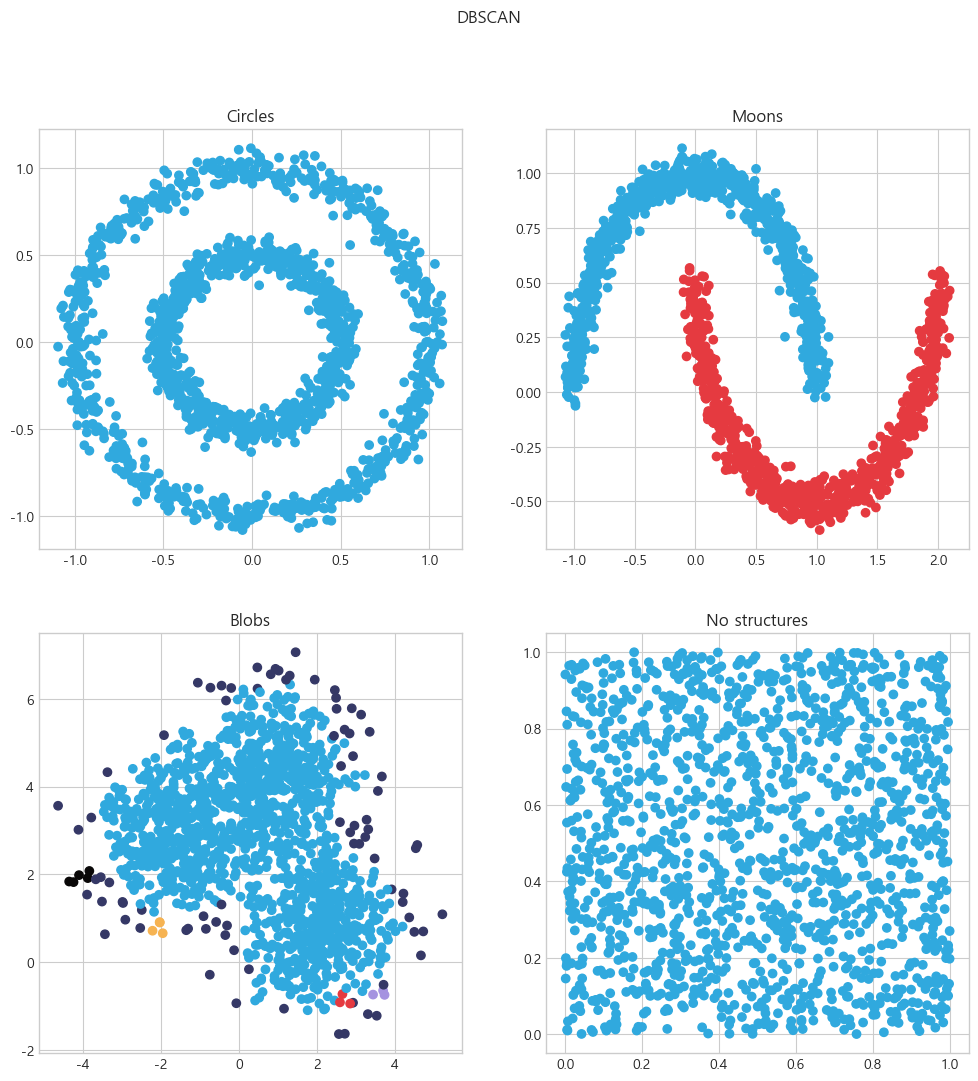

In [7]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle("DBSCAN")

fit_predict_plot(
    cluster.DBSCAN(eps=0.3), circles, 221, "Circles"
)  # eps(입실론) : 각 데이터 포인트 주변의 반경을 정의하는 파라미터
fit_predict_plot(cluster.DBSCAN(eps=0.3), moons, 222, "Moons")
fit_predict_plot(cluster.DBSCAN(eps=0.3), blobs, 223, "Blobs")
fit_predict_plot(cluster.DBSCAN(eps=0.3), no_structures, 224, "No structures")

## <span style="font-weight: bold;"> 4.Mean shift</span> 
- <span style="font-weight: bold;"> 중심점 후보를 정해진 구역 내 평균으로 업데이트</span>


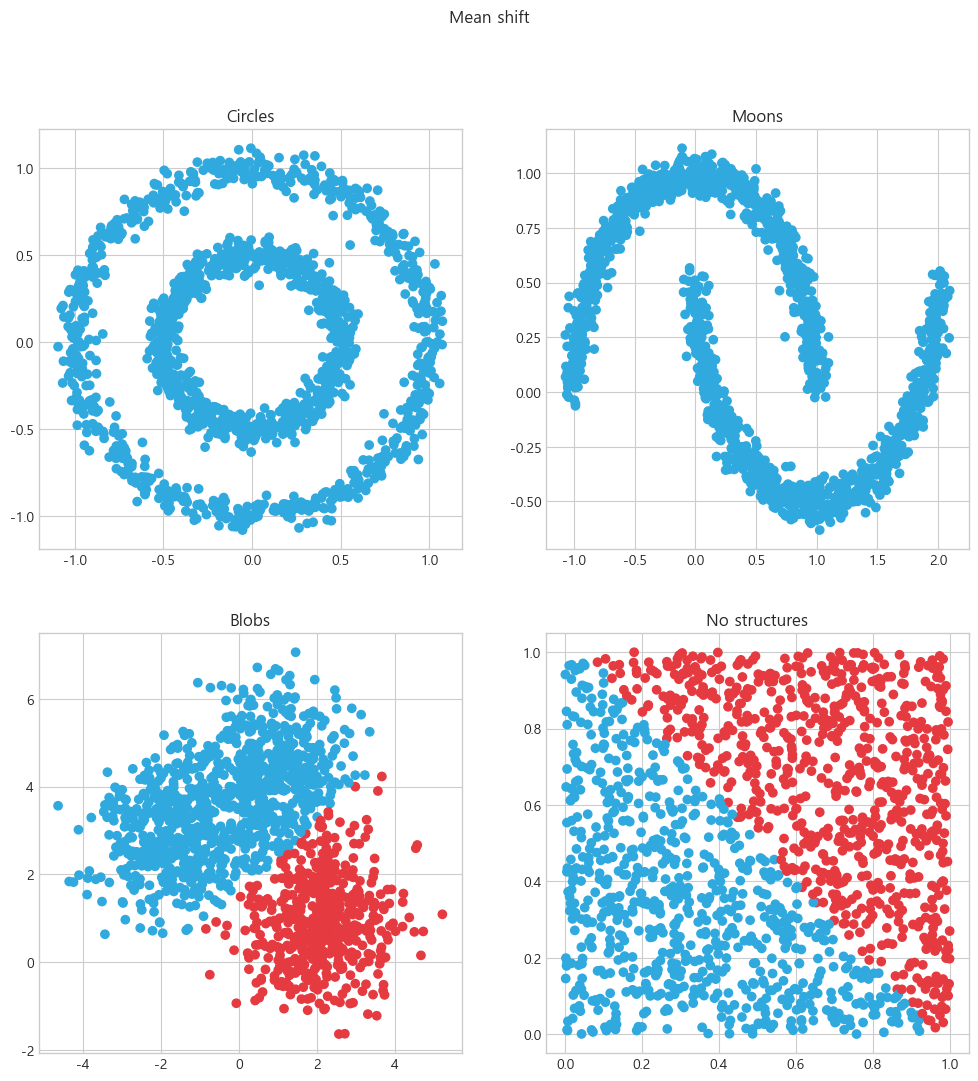

In [8]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle("Mean shift")

fit_predict_plot(cluster.MeanShift(), circles, 221, "Circles")
fit_predict_plot(cluster.MeanShift(), moons, 222, "Moons")
fit_predict_plot(cluster.MeanShift(), blobs, 223, "Blobs")
fit_predict_plot(cluster.MeanShift(), no_structures, 224, "No structures")

## <span style="font-weight: bold;"> 5.실습</span>

### <span style="font-weight: bold;"> 5.1<유방암 데이터></span>

#### <span style="font-weight: bold;">데이터셋 설명(Breast cancer dataset)</span>
- 30개의 X변수
- 1개의 카테고리형 Y변수 (2개 클래스)

### <span style="font-weight: bold;">5-2. 데이터 셋 확인 </span>

In [28]:
# 유방암 데이터셋 로드
cancer_df = pd.read_csv("../Data/breast_cancer_data.csv")
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [29]:
# 데이터 스케일링 (표준화)
X = cancer_df.iloc[:, :-1]
y = cancer_df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### <span style="font-weight: bold;">5-3. DBSCAN </span>

In [30]:
# DBSCAN 클러스터링
dbscan_cancer = cluster.DBSCAN(eps=0.5, min_samples=5)
labels_cancer = dbscan_cancer.fit_predict(X_scaled)

In [31]:
# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
X_cancer_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'PCA 2')

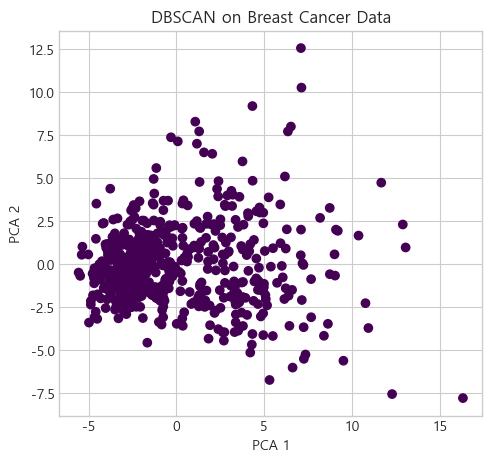

In [32]:
# 클러스터링 결과 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c=labels_cancer, cmap="viridis")
plt.title("DBSCAN on Breast Cancer Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

### <span style="font-weight: bold;">5-4. Mean shift </span>

In [33]:
# Mean Shift 클러스터링
mean_shift = MeanShift()
mean_shift.fit(X_scaled)
labels = mean_shift.labels_

In [34]:
# 클러스터링된 중심점 (centers)
cluster_centers = mean_shift.cluster_centers_

In [35]:
# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_centers_pca = pca.transform(cluster_centers)

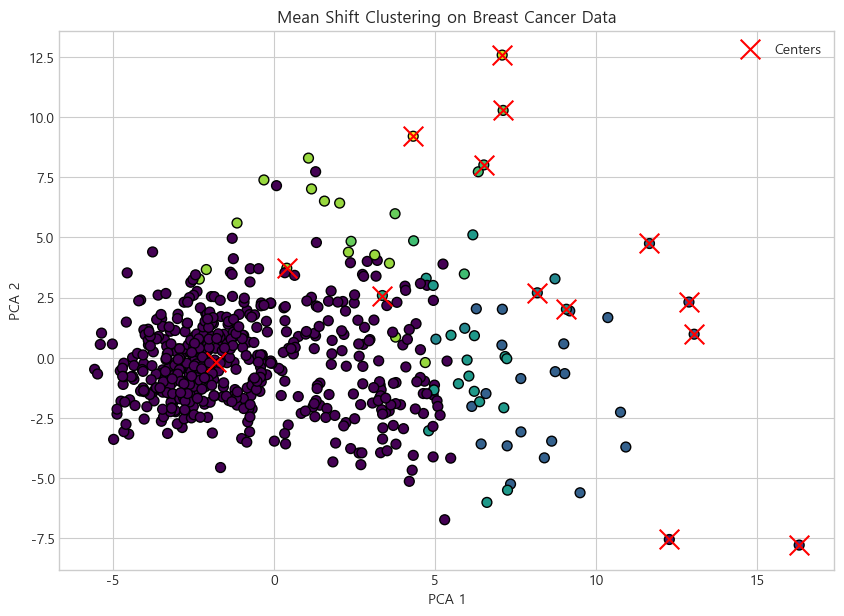

In [36]:
plt.figure(figsize=(10, 7))

# 데이터 포인트 시각화
plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", marker="o", edgecolor="k", s=50
)

# 클러스터 중심점 시각화
plt.scatter(
    cluster_centers_pca[:, 0],
    cluster_centers_pca[:, 1],
    c="red",
    marker="x",
    s=200,
    label="Centers",
)

plt.title("Mean Shift Clustering on Breast Cancer Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()  # 각 클러스터의 중심점이 빨간색 'x'로 표시, 밀도에 따라 자동으로 군집을 형성

## <span style="font-weight: bold;"> 6.실습</span>

### <span style="font-weight: bold;"> 6.1<와인 데이터></span>

#### <span style="font-weight: bold;">데이터셋 설명(Wine dataset)</span>
- 13개의 연속형 X변수
- 1개의 카테고리형 Y변수 (3개 클래스 / 군집분석 시 사용하지 않음)

### <span style="font-weight: bold;">6-2. 데이터 셋 확인 </span>

In [37]:
# 와인 데이터셋 로드
wine_df = pd.read_csv("../Data/wine_data.csv")
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [38]:
# 데이터 스케일링 (표준화)
X = cancer_df.iloc[:, :-1]
y = cancer_df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### <span style="font-weight: bold;">6-3. DBSCAN </span>

In [39]:
# DBSCAN 클러스터링
dbscan_wine = cluster.DBSCAN(eps=0.5, min_samples=5)
labels_wine = dbscan_wine.fit_predict(X_scaled)

In [40]:
# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'PCA 2')

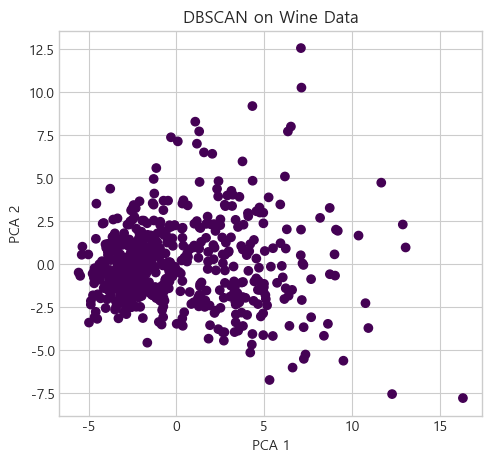

In [41]:
# 클러스터링 결과 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=labels_wine, cmap="viridis")
plt.title("DBSCAN on Wine Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

### <span style="font-weight: bold;">6-4. Mean shift </span>

In [42]:
# Mean Shift 클러스터링
mean_shift = MeanShift()
mean_shift.fit(X_scaled)
labels = mean_shift.labels_

In [43]:
# 클러스터링된 중심점 (centers)
cluster_centers = mean_shift.cluster_centers_

In [44]:
# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_centers_pca = pca.transform(cluster_centers)

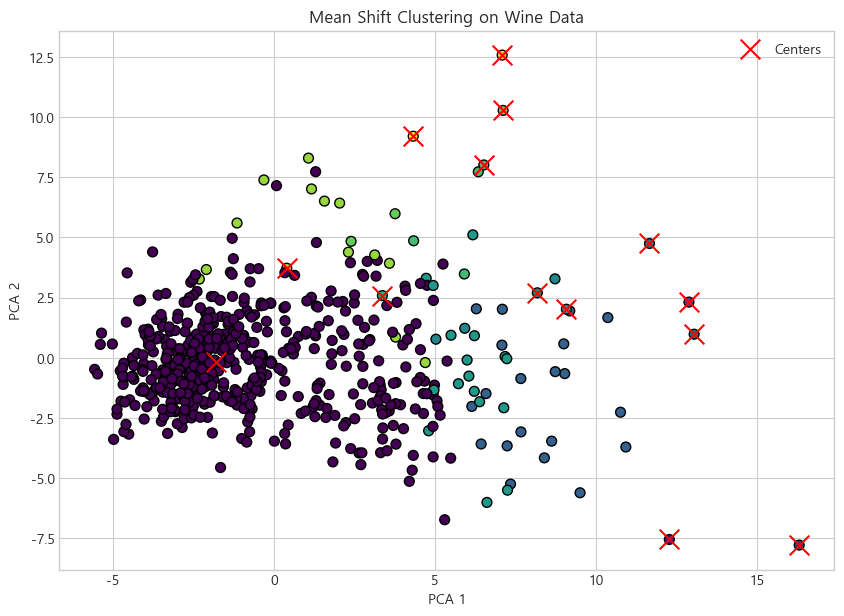

In [45]:
plt.figure(figsize=(10, 7))

# 데이터 포인트 시각화
plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", marker="o", edgecolor="k", s=50
)

# 클러스터 중심점 시각화
plt.scatter(
    cluster_centers_pca[:, 0],
    cluster_centers_pca[:, 1],
    c="red",
    marker="x",
    s=200,
    label="Centers",
)

plt.title("Mean Shift Clustering on Wine Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()  # 각 클러스터의 중심점이 빨간색 'x'로 표시, 밀도에 따라 자동으로 군집을 형성